<a href="https://colab.research.google.com/github/jpatrickweller/Data_Challenges/blob/main/Clairvoyant_Constructor_JPW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jiminey Crickets!! Its time for series... TIMESERIES!!

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving construction_material_prices_2008_2018.csv to construction_material_prices_2008_2018 (1).csv
User uploaded file "construction_material_prices_2008_2018.csv" with length 116986 bytes


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the usual suspects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp

# A few pandas parameters to adjust here...
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'


# And finally load the data
df = pd.read_csv('construction_material_prices_2008_2018.csv')

In [4]:
df.head()

,Unnamed: 0,price_steel,price_rebar,price_glass,price_concrete,price_plywood
0,2007-01-01,NaN,NaN,NaN,NaN,NaN
1,2007-01-03,NaN,NaN,NaN,NaN,NaN
2,2007-01-04,NaN,NaN,NaN,NaN,NaN
3,2007-01-05,NaN,NaN,NaN,NaN,NaN
4,2007-01-08,NaN,NaN,NaN,NaN,NaN


In [5]:
profile = pp.ProfileReport(df, title="Clairvoyant Constructor", html={'style':{'full_width': True}})

In [6]:
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = 'Date'


,price_steel,price_rebar,price_glass,price_concrete,price_plywood
Date,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-13,NaN,NaN,NaN,NaN,NaN
2018-06-14,NaN,NaN,NaN,NaN,NaN
2018-06-15,NaN,NaN,NaN,NaN,NaN


In [49]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
display(df.head())

datetime64[ns]


,price_steel,price_rebar,price_glass,price_concrete,price_plywood
Date,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN,NaN


<bound method _AxesBase.get_yticklabels of <matplotlib.axes._subplots.AxesSubplot object at 0x7fdad8910990>>


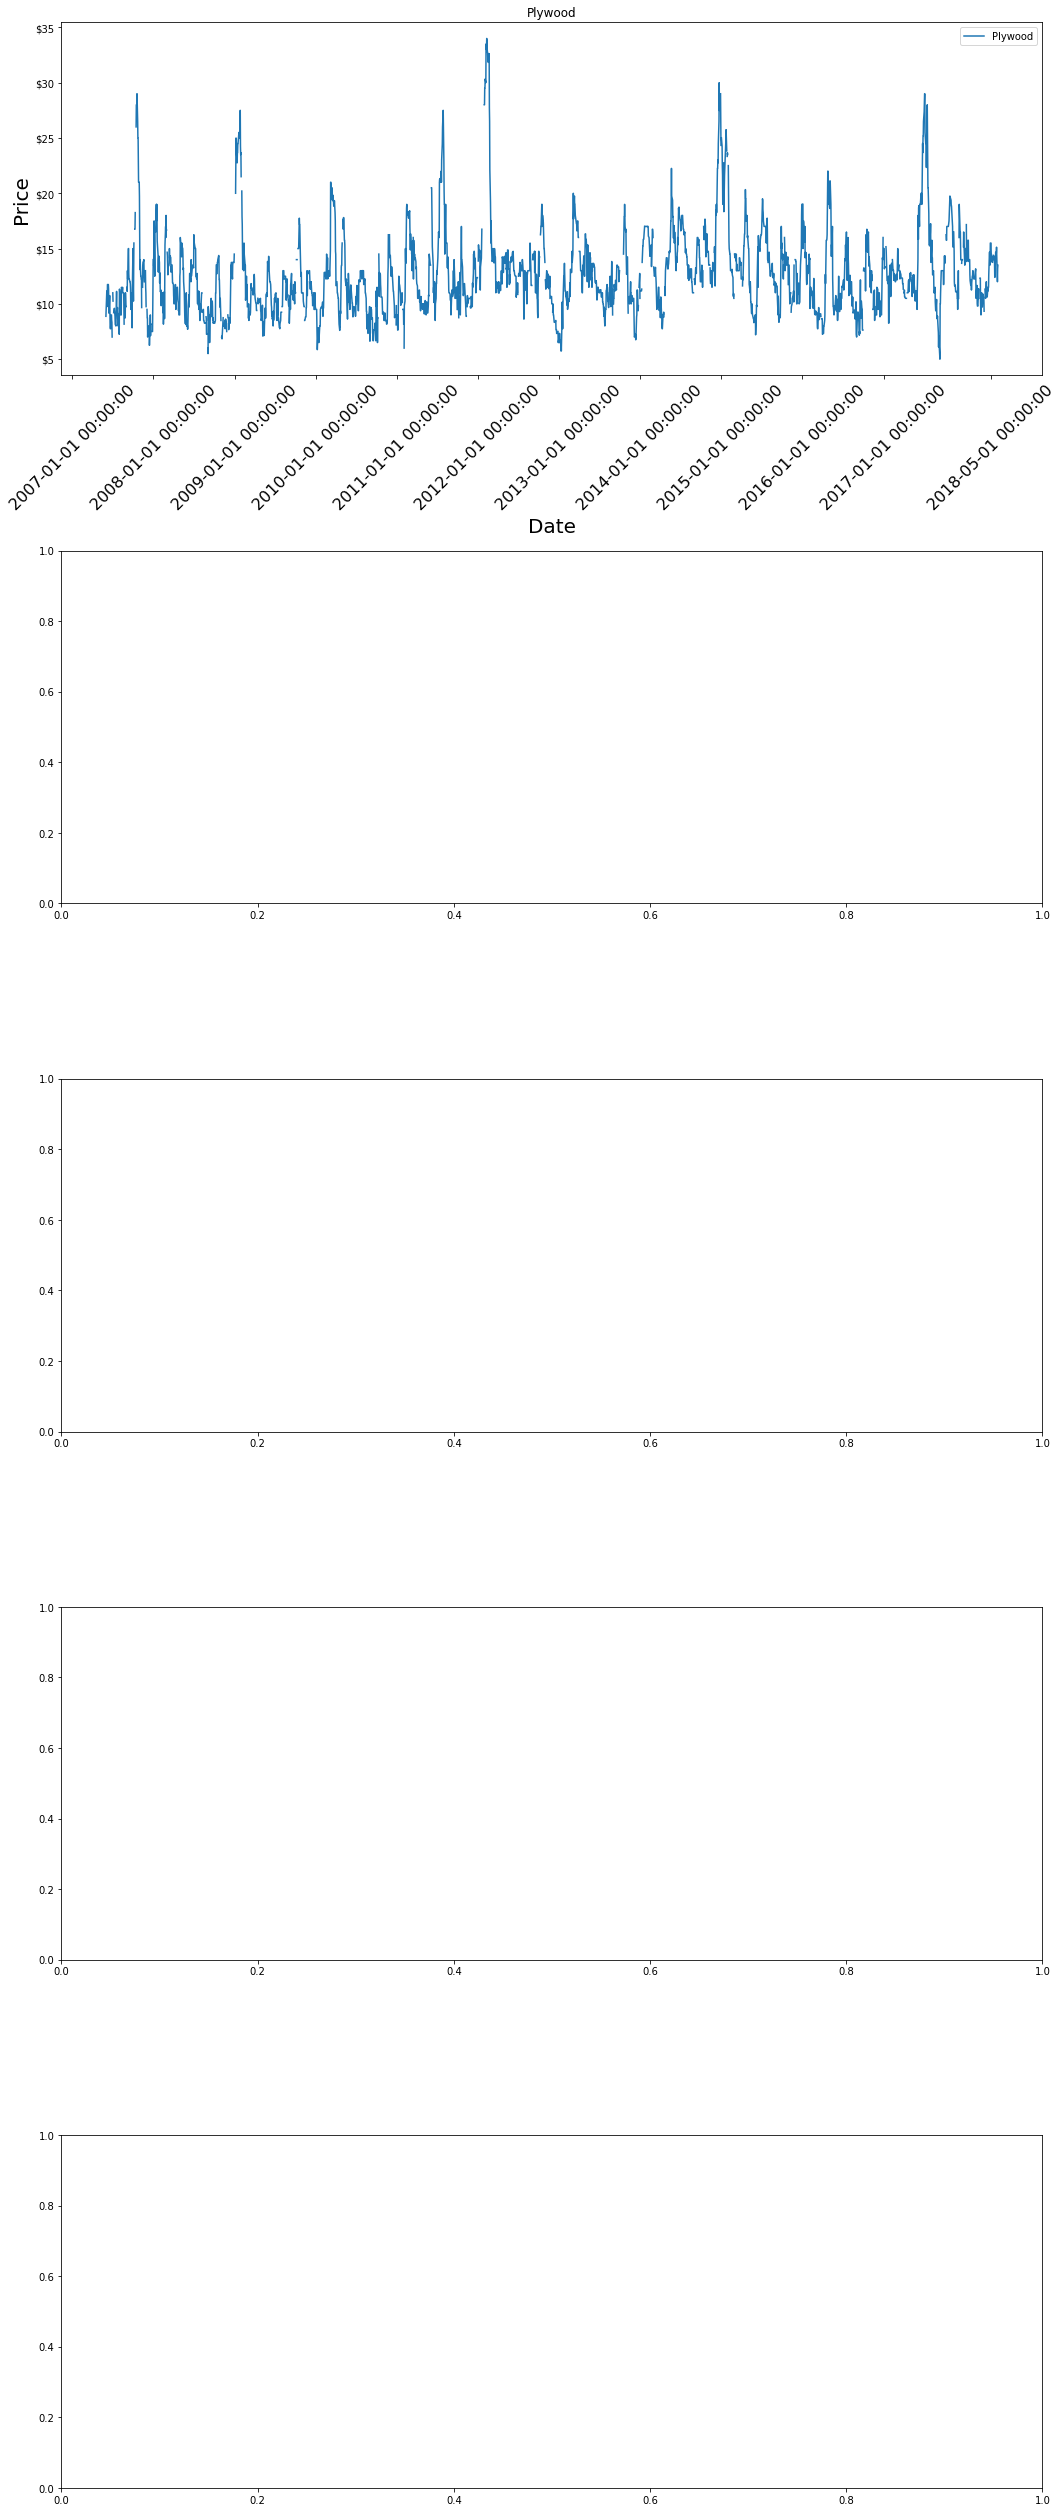

In [101]:
# Lets see those timeseries!
import matplotlib.ticker as mtick

# Load figure and subfigures
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize = (15, 35))#, sharex = True)
ax_dates = df.index[df.index.is_month_start][::12]

# Plywood
ax1.plot(df.price_plywood, label='Plywood')
ax1.legend(loc = 'best')
ax1.title.set_text("Plywood")

ax1.set_xlabel('Date', size=20)
ax1.set_xticks(ax_dates)
ax1.tick_params(axis='x',rotation=45)
ax1.set_xticklabels(ax_dates, size=16)

ax1.set_ylabel('Price', size=20)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
# ax1.yaxis.yticklabels()

print(ax1.get_yticklabels)
# Steel
# ax2.plot(df.price_steel)
# ax2.legend(loc = 'best')

# Rebar
# ax3.plot(df.price_rebar)
# ax3.legend(loc = 'best')

# Glass
# ax4.plot(df.price_glass)
# ax4.legend(loc = 'best')

# Concrete
# ax5.plot(df.price_concrete)
# ax5.legend(loc='best')

f.tight_layout()

plt.show()

In [61]:

df.index[df.index.is_month_start]

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2017-05-01', '2017-06-01', '2017-08-01', '2017-09-01',
               '2017-11-01', '2017-12-01', '2018-02-01', '2018-03-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)